In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = "data/train/"
list_df_files = list(filter(lambda x: ".csv" in x, os.listdir(data_dir)))
list_df_files

['train_18.csv', 'train_21.csv', 'train_35.csv']

In [30]:
# MANUAL SELLECTION
train_files = ['train_18.csv', 'train_35.csv']
test_files = ['train_21.csv']

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import math

def plot_hists(list_arrays):
    n_row = int(len(list_arrays)**0.5)
    n_col = math.ceil(len(list_arrays) / n_row)
    
    for i, data in enumerate(list_arrays):
        delta, array = data[0], data[1]
        
        # Set up the plot
        ax = plt.subplot(2, 2, i + 1)

        binwidth = int(array.shape[0] / 10)
    
        # Draw the plot
        ax.hist(array, bins = binwidth,
                 color = 'blue', edgecolor = 'black')
    
        # Title and labels
        ax.set_title(f'Histogram $\delta = {delta}$')
        ax.set_xlabel('$\gamma_A$')
        ax.set_ylabel('Counts')

        ax.grid(which='major', color='#DDDDDD', linewidth=0.9)
        ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.7)
        ax.minorticks_on()
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.yaxis.set_minor_locator(AutoMinorLocator(10))
    
    plt.tight_layout()
    plt.show()

In [32]:
def print_info(df, name="default"):
    true_marks = np.count_nonzero(df.mark.to_numpy() == 1)
    false_marks = np.count_nonzero(df.mark.to_numpy() == 0)
    print(f"{name}: ", "total : ", df.shape[0], f"-- 1: {true_marks} - {true_marks/df.shape[0]*100:.2f}%", f"-- 0: {false_marks} - {false_marks/df.shape[0]*100:.2f}%")
    print("-----")

def collect_df(list_filenames, dir):

    total_df = pd.read_csv(dir + list_filenames[0])
    
    # print_info(total_df, name=list_filenames[0])

    plot_arrays = [[total_df.delta.iloc[0], total_df.growth.to_numpy()]]
    for file_i_name in list_filenames[1:]:
        df = pd.read_csv(dir + file_i_name)
        total_df = pd.concat([total_df, df], ignore_index=True)

        plot_arrays.append([df.delta.iloc[0], df.growth.to_numpy()])
        # print_info(total_df, name=file_i_name)
        
    plot_hists(plot_arrays)
    
    return total_df

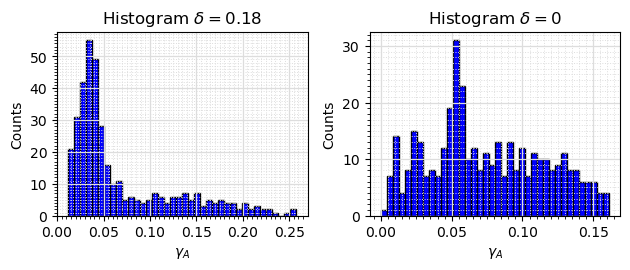

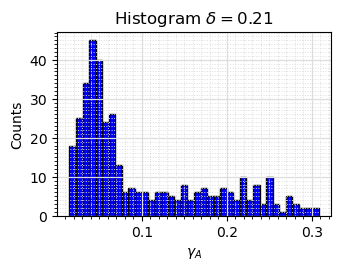

Part of the test dataset: 33.33%


In [33]:
train_df = collect_df(train_files, data_dir)
test_df = collect_df(test_files, data_dir)

print(f"Part of the test dataset: {test_df.shape[0] / (train_df.shape[0] + test_df.shape[0]) * 100:.2f}%")

In [34]:
index = "wo_aug"
train_df.to_csv(f"../Predict Peeling-Ballooning Mode/data/train_{index}_set.csv", index=False)  # data_dir + "train_set.csv"
test_df.to_csv(f"../Predict Peeling-Ballooning Mode/data/test_{index}_set.csv", index=False)  # data_dir + "test_set.csv"

print(f"Total volume: {train_df.shape[0] + test_df.shape[0]}")

Total volume: 1140
